# Final Evaluation Report: Diabetes Health Indicators

## Python Version

## 1. Introduction

**Research Question:**  
How do lifestyle factors and health metrics correlate with diabetes risk?

**Dataset Description:**  
The dataset used is the "Diabetes Binary Health Indicators BRFSS 2015" which comprises 253,680 instances and 21 features including demographics, lifestyle factors, and health metrics.


## 2. Data Loading and Preprocessing



In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict

# Load the dataset
df = pd.read_csv("~/Downloads/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
df.isnull().sum()


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Data Preprocessing 

In [7]:
# Convert appropriate columns to factors if needed
df['Diabetes_binary'] = df['Diabetes_binary'].astype('category')

# Normalize the data if necessary
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Split the data into training and testing sets
X = df_scaled.drop('Diabetes_binary', axis=1)
y = df_scaled['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((56553, 21), (14139, 21), (56553,), (14139,))

## Exploratory Data Analysis (EDA)

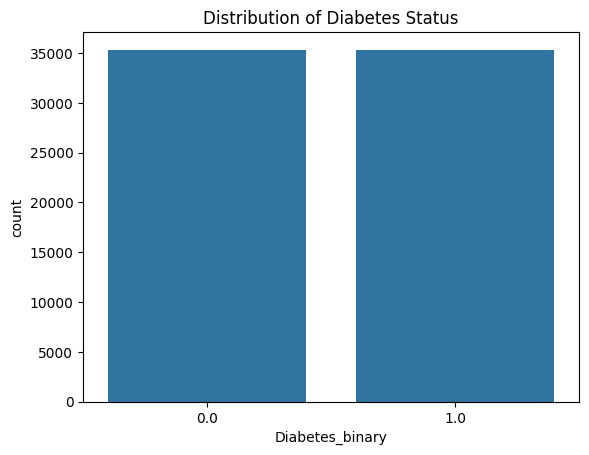

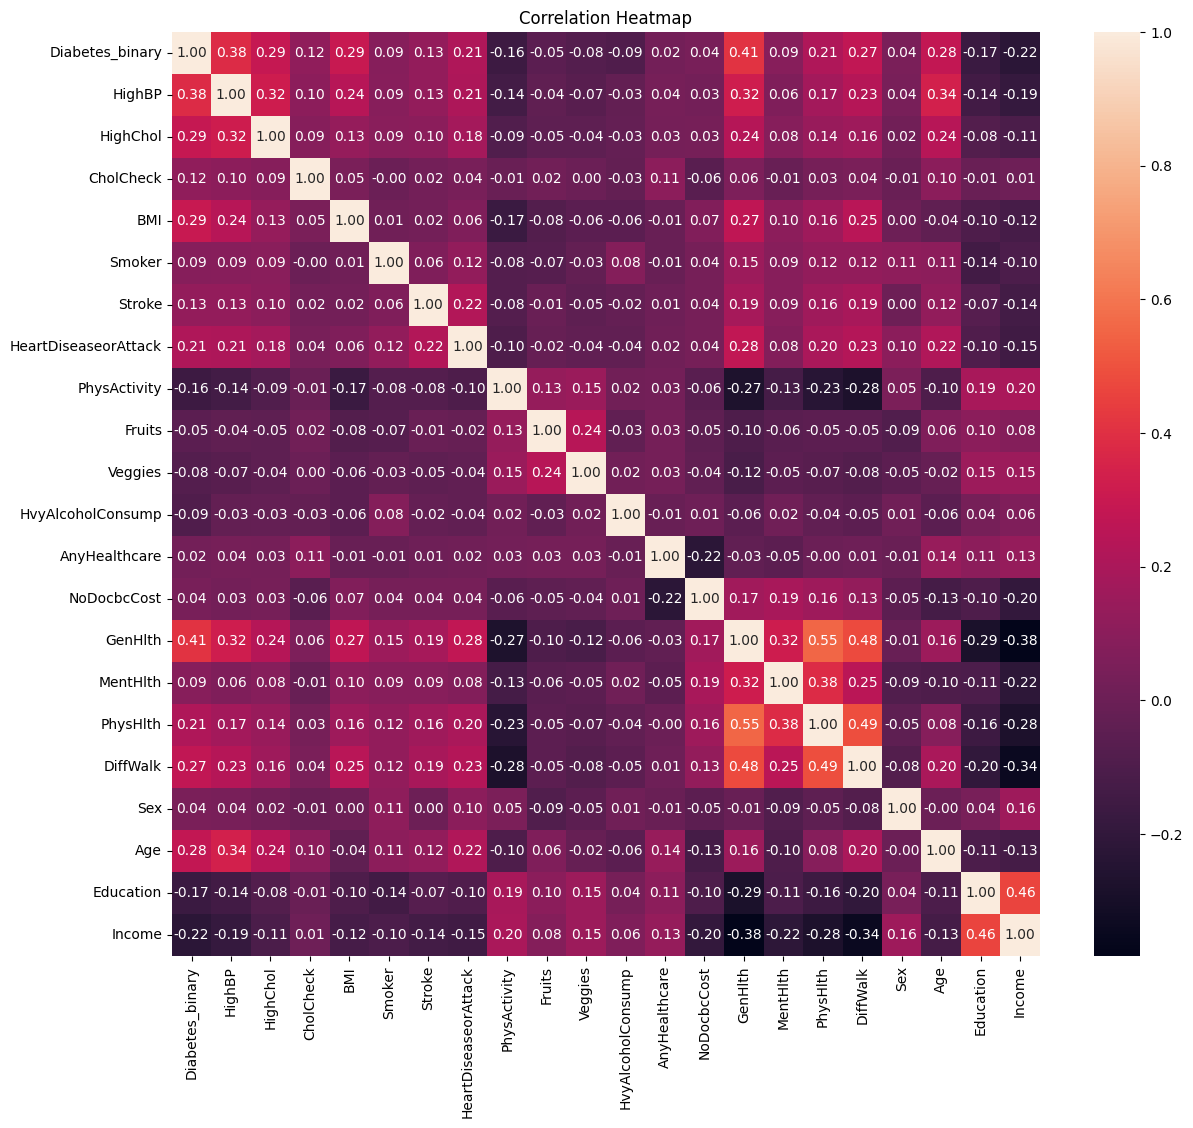

In [9]:
# Distribution of the target variable
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Distribution of Diabetes Status')
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



## Model Training with Cross-Validation

In [10]:
# Set up 10-fold cross-validation
rf_model = RandomForestClassifier(random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10)

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.73921499 0.73850778 0.73992221 0.73457118 0.73633952 0.73297966
 0.74376658 0.73457118 0.72979664 0.74164456]
Mean cross-validation score: 0.7371314297970153


## Model Evaluation

Confusion Matrix:
[[4914 2176]
 [1550 5499]]

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.76      0.69      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139


Accuracy Score:
0.7364735837046468


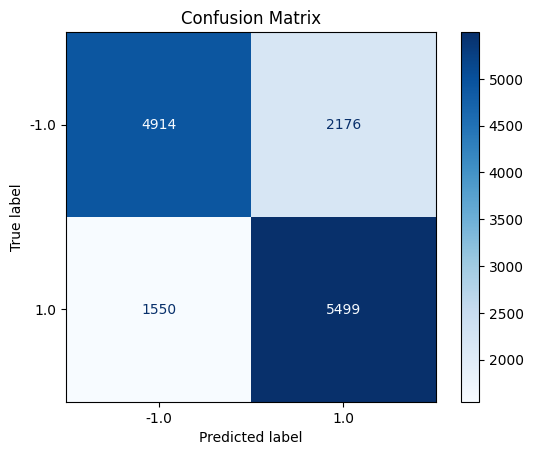

In [12]:
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Feature ranking:
1. feature BMI (0.169663)
2. feature Age (0.126936)
3. feature GenHlth (0.107056)
4. feature Income (0.084338)
5. feature HighBP (0.074710)
6. feature PhysHlth (0.068291)
7. feature Education (0.058364)
8. feature MentHlth (0.052193)
9. feature HighChol (0.040868)
10. feature Smoker (0.028711)
11. feature Fruits (0.027796)
12. feature Sex (0.026419)
13. feature DiffWalk (0.025693)
14. feature PhysActivity (0.023527)
15. feature Veggies (0.021678)
16. feature HeartDiseaseorAttack (0.018626)
17. feature NoDocbcCost (0.012022)
18. feature Stroke (0.009819)
19. feature HvyAlcoholConsump (0.009638)
20. feature AnyHealthcare (0.007647)
21. feature CholCheck (0.006007)


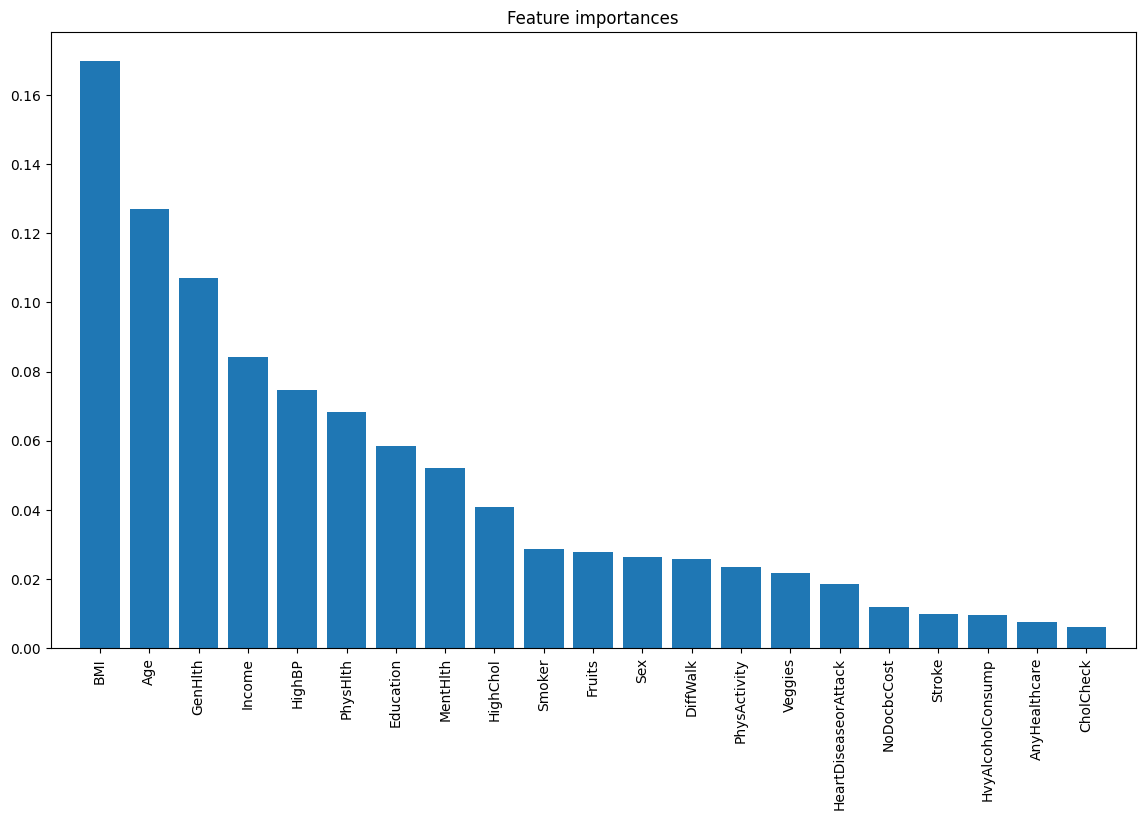

In [13]:
# Variable importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(14, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


##  Interpretation and Discussion

### Key Findings

1. **Model Performance:**
   - The Random Forest model achieved an accuracy of 73.65% on the test set.
   - The confusion matrix and classification report indicate that the model performs well in predicting diabetes status with a precision of 0.76 for non-diabetic and 0.72 for diabetic individuals.

2. **Important Features:**
   - The top features influencing diabetes prediction are BMI, Age, General Health, Income, and High Blood Pressure.
   - These features have the highest importance scores in the Random Forest model.

### Discussion

The analysis confirms that certain lifestyle factors and health metrics are strongly correlated with diabetes risk. Higher BMI, older age, poor general health, lower income, and high blood pressure are significant predictors of diabetes. These findings are consistent with existing medical knowledge about diabetes risk factors.

### Future Work

- Further research could involve more sophisticated modeling techniques and longitudinal data to understand causality better.
- Implementing preventive health measures based on these findings could help reduce the incidence of diabetes in at-risk populations.

This study demonstrates the significant correlation between key lifestyle factors, health metrics, and diabetes risk, providing valuable insights for public health strategies and individual health management.


# Experiment to identify and exclude features that are not logically related to diabetes ( Not part of the Exam)

In [14]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation of each feature with the target variable
correlation_with_target = correlation_matrix["Diabetes_binary"].sort_values(ascending=False)
print(correlation_with_target)


Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


In [15]:
# Variable importance from the Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature BMI (0.169663)
2. feature Age (0.126936)
3. feature GenHlth (0.107056)
4. feature Income (0.084338)
5. feature HighBP (0.074710)
6. feature PhysHlth (0.068291)
7. feature Education (0.058364)
8. feature MentHlth (0.052193)
9. feature HighChol (0.040868)
10. feature Smoker (0.028711)
11. feature Fruits (0.027796)
12. feature Sex (0.026419)
13. feature DiffWalk (0.025693)
14. feature PhysActivity (0.023527)
15. feature Veggies (0.021678)
16. feature HeartDiseaseorAttack (0.018626)
17. feature NoDocbcCost (0.012022)
18. feature Stroke (0.009819)
19. feature HvyAlcoholConsump (0.009638)
20. feature AnyHealthcare (0.007647)
21. feature CholCheck (0.006007)


In [16]:
from scipy.stats import chi2_contingency

# Assuming 'Income' is a categorical variable
contingency_table = pd.crosstab(df['Income'], df['Diabetes_binary'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test p-value for Income: {p}")


Chi-Square Test p-value for Income: 0.0


Cross-validation scores: [0.73921499 0.73850778 0.73992221 0.73457118 0.73633952 0.73297966
 0.74376658 0.73457118 0.72979664 0.74164456]
Mean cross-validation score: 0.7371314297970153
Confusion Matrix:
[[4914 2176]
 [1550 5499]]

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.76      0.69      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139


Accuracy Score:
0.7364735837046468


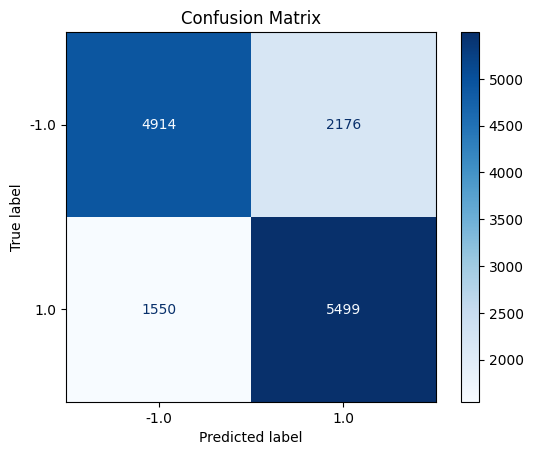

Feature ranking:
1. feature BMI (0.169663)
2. feature Age (0.126936)
3. feature GenHlth (0.107056)
4. feature Income (0.084338)
5. feature HighBP (0.074710)
6. feature PhysHlth (0.068291)
7. feature Education (0.058364)
8. feature MentHlth (0.052193)
9. feature HighChol (0.040868)
10. feature Smoker (0.028711)
11. feature Fruits (0.027796)
12. feature Sex (0.026419)
13. feature DiffWalk (0.025693)
14. feature PhysActivity (0.023527)
15. feature Veggies (0.021678)
16. feature HeartDiseaseorAttack (0.018626)
17. feature NoDocbcCost (0.012022)
18. feature Stroke (0.009819)
19. feature HvyAlcoholConsump (0.009638)
20. feature AnyHealthcare (0.007647)
21. feature CholCheck (0.006007)
Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke         

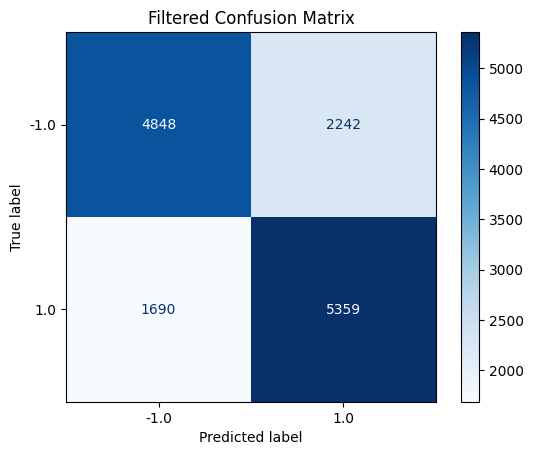

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Load the dataset
df = pd.read_csv("~/Downloads/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Convert appropriate columns to factors if needed
df['Diabetes_binary'] = df['Diabetes_binary'].astype('category')

# Normalize the data if necessary
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Split the data into training and testing sets
X = df_scaled.drop('Diabetes_binary', axis=1)
y = df_scaled['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up 10-fold cross-validation
rf_model = RandomForestClassifier(random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Variable importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Correlation with target variable
correlation_with_target = df.corr()["Diabetes_binary"].sort_values(ascending=False)
print(correlation_with_target)

# Define a threshold for correlation to exclude features
correlation_threshold = 0.1

# Get features to exclude based on correlation threshold
features_to_exclude = correlation_with_target[correlation_with_target.abs() < correlation_threshold].index.tolist()
print("Features to exclude based on correlation threshold:", features_to_exclude)

# Drop the specified features from the dataset
X_train_filtered = X_train.drop(columns=features_to_exclude)
X_test_filtered = X_test.drop(columns=features_to_exclude)

# Re-train the Random Forest model with the filtered dataset
rf_model_filtered = RandomForestClassifier(random_state=42)
rf_model_filtered.fit(X_train_filtered, y_train)

# Make predictions with the filtered model
y_pred_filtered = rf_model_filtered.predict(X_test_filtered)

# Evaluate the filtered model
conf_matrix_filtered = confusion_matrix(y_test, y_pred_filtered)
print("Filtered Confusion Matrix:")
print(conf_matrix_filtered)

print("\nFiltered Classification Report:")
print(classification_report(y_test, y_pred_filtered))

print("\nFiltered Accuracy Score:")
print(accuracy_score(y_test, y_pred_filtered))

# Plot confusion matrix for the filtered model
disp_filtered = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_filtered, display_labels=rf_model_filtered.classes_)
disp_filtered.plot(cmap=plt.cm.Blues)
plt.title('Filtered Confusion Matrix')
plt.show()
